In [43]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
file_path = './input/iridata.csv'
data = pd.read_csv(file_path)
data.head()

,romdasSpikes,calcSpikes,iri,meanY,sdY,meanX,sdX,meanZ,sdZ,romLog,iroadLog
0,1214.0,18,3.95,9.800661,0.055887,5.058507e-19,0.055887,0.001917,0.055887,3.084219,1.255273
1,1403.0,24,4.17,9.799531,0.075717,9.036493e-19,0.075717,-0.001395,0.075717,3.147058,1.380211
2,1268.0,25,4.02,9.800078,0.082260,-2.266968e-19,0.082260,-0.010717,0.082260,3.103119,1.397940
3,943.0,17,3.64,9.802008,0.069349,5.778928e-19,0.069349,0.009442,0.069349,2.974512,1.230449
4,1715.0,269,4.54,9.799757,0.100402,1.446625e-19,0.100402,0.000898,0.100402,3.234264,2.429752


In [44]:
# data = data.dropna(axis=0)
y = data.iri
y.head()

0    3.95
1    4.17
2    4.02
3    3.64
4    4.54
Name: iri, dtype: float64

In [45]:
data.columns

Index(['romdasSpikes', 'calcSpikes', 'iri', 'meanY', 'sdY', 'meanX', 'sdX',
       'meanZ', 'sdZ', 'romLog', 'iroadLog'],
      dtype='object')

In [78]:
features = ['calcSpikes', 'sdY']
X = data[features]
X.head()

,calcSpikes,sdY
0,18,0.055887
1,24,0.075717
2,25,0.082260
3,17,0.069349
4,269,0.100402


In [79]:

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### Parameter tunning

In [109]:

model = RandomForestRegressor()
parameters = [{'max_depth' : [1,2,3,4,5,6,10,20], 'n_estimators' : [1,2,3,4,5,10,20,30,40,50,60,70,80,100],
               'min_samples_leaf' : [0.01,0.02,0.03,0.005]}]
grid = GridSearchCV(model,parameters,cv=3)
grid.fit(train_X, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 10, 20], 'n_estimators': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 100], 'min_samples_leaf': [0.01, 0.02, 0.03, 0.005]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.02, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [111]:
model = grid.best_estimator_


In [100]:
model = XGBRegressor(n_estimators=1000)
model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X, val_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [81]:
# val_y.head()

In [112]:
val_predictions = model.predict(val_X)
# val_predictions

In [113]:
# 0.3740101361580786 best rf
# 0.38074890325466787 best xg
print(mean_absolute_error(val_y, val_predictions))

0.3753907619033536


In [11]:
# from sklearn.tree import DecisionTreeRegressor

# def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
#     model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
#     model.fit(train_X, train_y)
#     preds_val = model.predict(val_X)
#     mae = mean_absolute_error(val_y, preds_val)
#     return(mae)

# for max_leaf_nodes in [5, 50, 500, 5000]:
#     my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [97]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install xgboost

In [13]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [115]:
import plotly.graph_objs as go
# https://plot.ly/~aminda/5/
iplot([go.Scatter(x=list(range(len(val_predictions))), y=val_y, mode='lines', name = "actual"),
      go.Scatter(x=list(range(len(val_predictions))), y=val_predictions, mode='lines', name = "predicted")])

In [116]:
iplot([go.Scatter(x=val_predictions, y=val_y, mode='markers')])
# https://plot.ly/~aminda/3/

Text(0.5,1,'Acceleration Data Correlations')

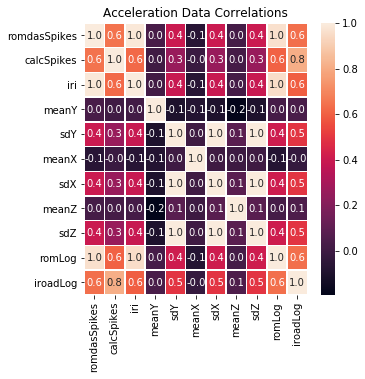

In [96]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Acceleration Data Correlations')